In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
data=pd.read_csv('ass_2_data.csv')

In [144]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [145]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [146]:
categorical=data.select_dtypes(exclude=['number'])

In [147]:
numerical=data.select_dtypes(include=['number'])

In [148]:
data.shape

(310, 7)

In [149]:
numerical.shape

(310, 6)

In [150]:
categorical.shape

(310, 1)

# So,,there is no missing value

In [151]:
data['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [152]:
codes={'Normal':0, 'Hernia':1, 'Spondylolisthesis':2}
data['class']=data['class'].map(codes)

In [153]:
data['class'].count()

310

In [154]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


# 2(b) FInding Two feature which gives better accuracy

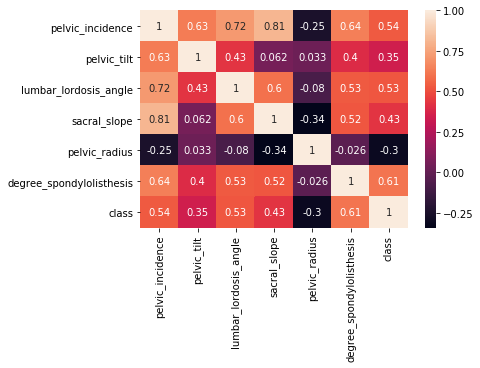

In [155]:
corr=data.corr()
sns.heatmap(corr,annot=True)

In [156]:
print(data.columns.values)

['pelvic_incidence' 'pelvic_tilt' 'lumbar_lordosis_angle' 'sacral_slope'
 'pelvic_radius' 'degree_spondylolisthesis' 'class']


In [157]:
X1=data.loc[:,'pelvic_radius':'degree_spondylolisthesis']
Y1=data['class']

In [158]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=1)

In [159]:
from sklearn.svm import SVC

In [160]:
svm=SVC(kernel='linear',random_state=1,gamma=.10,C=1.0)
svm.fit(X1_train,Y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
predictions=svm.predict(X1_test)
from sklearn.metrics import classification_report
report=classification_report(predictions,Y1_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.55      0.75      0.63         8
           2       0.90      1.00      0.95        28

   micro avg       0.85      0.85      0.85        62
   macro avg       0.80      0.83      0.80        62
weighted avg       0.88      0.85      0.86        62



# 2(c) FInding Confusion Matrix

In [162]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y1_test,predictions))

0.8548387096774194


In [163]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y1_test,predictions))

[[19  1  0]
 [ 5  6  0]
 [ 2  1 28]]


# 2(a) continuous scatter plot using scatter matrix

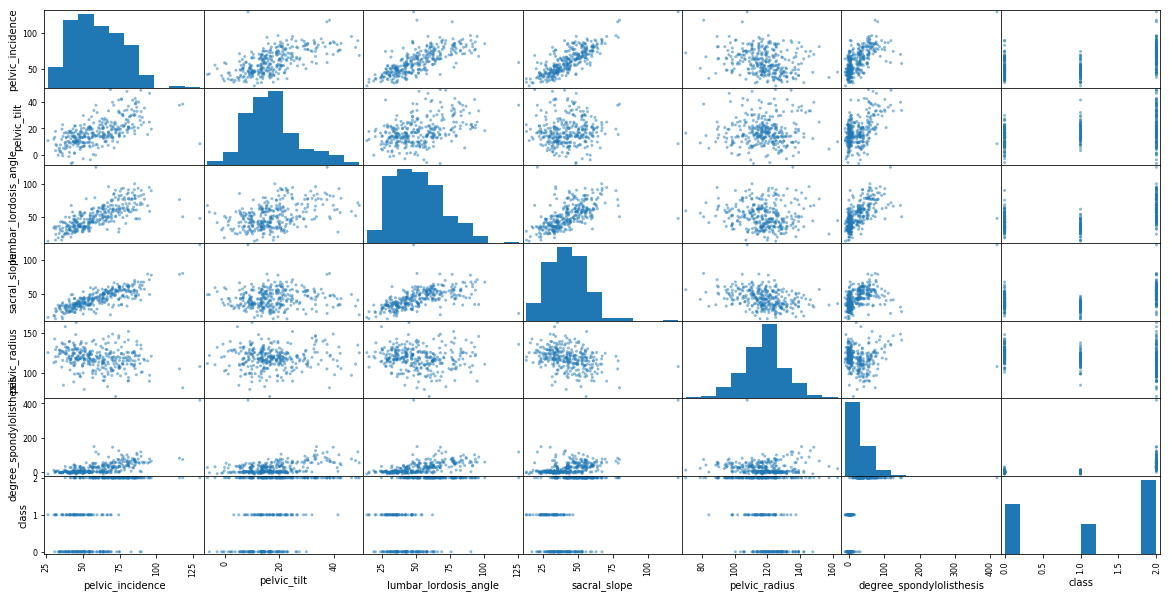

In [164]:
#Scatter Matrix

from pandas.plotting import scatter_matrix

scatter_matrix(data,figsize=(20, 10))

plt.show()

In [165]:
Y=data['class']
X=data.drop('class',axis=1)

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [167]:
from sklearn.svm import SVC


In [168]:
svm=SVC(kernel='rbf',random_state=1,gamma=.10,C=1.0)

In [169]:
svm.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [170]:
predictions=svm.predict(X_test)

In [171]:
from sklearn.metrics import classification_report
report=classification_report(predictions,Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67        62

   micro avg       0.50      0.50      0.50        62
   macro avg       0.33      0.17      0.22        62
weighted avg       1.00      0.50      0.67        62



/home/bjit-532/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/bjit-532/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/bjit-532/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [172]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.5


In [173]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,predictions))

[[ 0  0 20]
 [ 0  0 11]
 [ 0  0 31]]
